In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
#import requests
import math
#from termcolor import colored as cl 
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
stock_data = pd.read_csv("BANDHANBNK.csv")
stock_data.head(2)

,Date,Open,High,Low,Close,Volume
0,2020-01-01,509.074605,510.021409,499.30772,501.300964,5.220273e+05
1,2020-01-02,501.251154,501.251154,493.57715,497.314484,1.841966e+06


In [3]:
stock_data = stock_data.set_index("Date")
stock_data = stock_data.drop(["Volume"], axis=1)
stock_data.head(2)

,Open,High,Low,Close
Date,,,,
2020-01-01,509.074605,510.021409,499.30772,501.300964
2020-01-02,501.251154,501.251154,493.57715,497.314484


In [4]:
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

stock_data['sma_20'] = sma(stock_data['Close'], 20)
stock_data = stock_data.dropna(how = "any")
stock_data.head(2)

,Open,High,Low,Close,sma_20
Date,,,,,
2020-01-28,473.395548,475.388792,458.446215,460.738434,487.114052
2020-01-29,463.429322,464.425944,443.746034,449.626099,484.530309


In [5]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

stock_data['upper_bb'], stock_data['lower_bb'] = bb(stock_data['Close'], stock_data['sma_20'], 20)
stock_data = stock_data.dropna(how = "any")
stock_data.head(2)

,Open,High,Low,Close,sma_20,upper_bb,lower_bb
Date,,,,,,,
2020-02-25,417.584707,424.511244,400.642129,402.535706,436.784633,474.374403,399.194862
2020-02-26,413.598228,421.571206,389.978269,392.768829,433.386153,474.024013,392.748292


In [6]:
stock_data["Date"] = stock_data.index
stock_data

,Open,High,Low,Close,sma_20,upper_bb,lower_bb,Date
Date,,,,,,,,
2020-02-25,417.584707,424.511244,400.642129,402.535706,436.784633,474.374403,399.194862,2020-02-25
2020-02-26,413.598228,421.571206,389.978269,392.768829,433.386153,474.024013,392.748292,2020-02-26
2020-02-27,393.665759,404.628603,385.991756,397.452911,430.777493,473.662111,387.892876,2020-02-27
2020-02-28,383.898890,387.436887,368.750220,382.204620,428.076646,476.022831,380.130461,2020-02-28
2020-03-02,394.463052,405.475746,383.699545,392.718964,425.271153,474.649544,375.892762,2020-03-02
...,...,...,...,...,...,...,...,...
2023-06-23,239.199997,243.399994,234.899994,235.750000,256.362502,276.708325,236.016679,2023-06-23
2023-06-26,236.600006,239.500000,233.500000,236.550003,254.982502,276.795470,233.169534,2023-06-26
2023-06-27,237.699997,240.850006,236.600006,238.000000,253.497501,275.705334,231.289668,2023-06-27


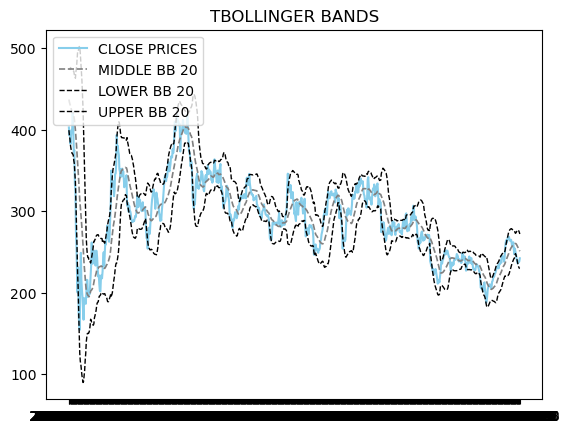

In [7]:
plt.plot(stock_data["Close"], label = 'CLOSE PRICES', color = 'skyblue')
plt.plot(stock_data["sma_20"], label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
plt.plot(stock_data["lower_bb"], label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.plot(stock_data["upper_bb"], label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('TBOLLINGER BANDS')
#plt.grid()
plt.show()

In [8]:
def implement_bb_strategy(data, lower_bb, upper_bb, date):
    buy_price = []
    sell_price = []
    bb_signal = []
    list_date = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                list_date.append(date[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                list_date.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                list_date.append(np.nan)
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                list_date.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            list_date.append(np.nan)
            
    return buy_price, sell_price, bb_signal, list_date

buy_price, sell_price, bb_signal, list_date = implement_bb_strategy(stock_data['Close'], stock_data['lower_bb'], 
                                                         stock_data['upper_bb'], stock_data["Date"])

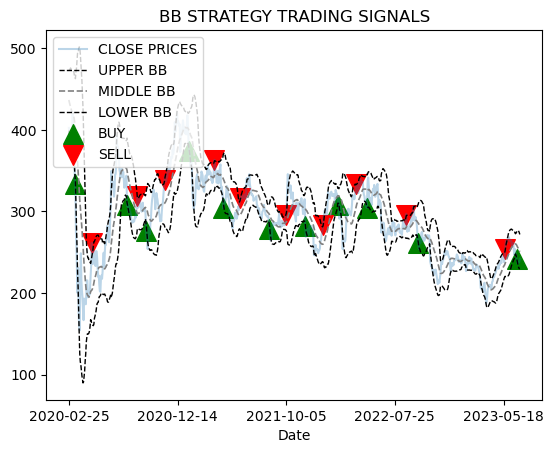

In [9]:
stock_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
stock_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
stock_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
stock_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(stock_data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(stock_data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
len(buy_price), len(sell_price), len(bb_signal)
buy_price

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 333.8186340332031,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 307.7569274902344,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 276.2637023925781,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [11]:
df_strategy = pd.DataFrame()
df_strategy["Buy"] = buy_price
df_strategy["Sell"] = sell_price
df_strategy["Date"] = list_date
#df_strategy["Signal"] = bb_signal

In [12]:
#df_trade = df_strategy[["Buy", "Sell"]].dropna(how = "all").reset_index(drop=True)
#df_trade1 = df_strategy
df_trade = df_strategy.dropna(how = "all").reset_index(drop=True)
df_trade

,Buy,Sell,Date
0,333.818634,NaN,2020-03-12
1,NaN,261.463837,NaN
2,307.756927,NaN,2020-08-03
3,NaN,318.968933,NaN
4,276.263702,NaN,2020-09-21
5,NaN,338.951233,NaN
6,373.833008,NaN,2021-01-13
7,NaN,363.418274,NaN
8,303.870117,NaN,2021-04-19
9,NaN,316.626892,NaN


In [13]:
df_trade["Sell"] = df_trade["Sell"].shift(-1)
df_trade = df_trade.reset_index(drop=True)
df_trade = df_trade.dropna(how = "any")
df_trade

,Buy,Sell,Date
0,333.818634,261.463837,2020-03-12
2,307.756927,318.968933,2020-08-03
4,276.263702,338.951233,2020-09-21
6,373.833008,363.418274,2021-01-13
8,303.870117,316.626892,2021-04-19
10,278.149994,295.350006,2021-08-20
12,282.649994,283.649994,2021-11-26
14,307.600006,333.450012,2022-02-22
16,304.149994,295.750000,2022-05-12
18,261.549988,253.800003,2022-09-26


In [14]:
df_strategy

,Buy,Sell,Date
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
826,NaN,NaN,NaN
827,NaN,NaN,NaN
828,NaN,NaN,NaN
829,NaN,NaN,NaN


In [15]:
df_trade["PnL"] = df_trade["Sell"] - df_trade["Buy"]
df_trade["Profit"] = (df_trade["PnL"]/df_trade["Buy"])*100
df_trade

,Buy,Sell,Date,PnL,Profit
0,333.818634,261.463837,2020-03-12,-72.354797,-21.674883
2,307.756927,318.968933,2020-08-03,11.212006,3.643137
4,276.263702,338.951233,2020-09-21,62.687531,22.691193
6,373.833008,363.418274,2021-01-13,-10.414734,-2.785932
8,303.870117,316.626892,2021-04-19,12.756775,4.198101
10,278.149994,295.350006,2021-08-20,17.200012,6.183718
12,282.649994,283.649994,2021-11-26,1.000000,0.353794
14,307.600006,333.450012,2022-02-22,25.850006,8.403773
16,304.149994,295.750000,2022-05-12,-8.399994,-2.761793
18,261.549988,253.800003,2022-09-26,-7.749985,-2.963099


In [16]:
df_trade["CumProfit"] = df_trade["Profit"].cumsum()
df_trade

,Buy,Sell,Date,PnL,Profit,CumProfit
0,333.818634,261.463837,2020-03-12,-72.354797,-21.674883,-21.674883
2,307.756927,318.968933,2020-08-03,11.212006,3.643137,-18.031746
4,276.263702,338.951233,2020-09-21,62.687531,22.691193,4.659447
6,373.833008,363.418274,2021-01-13,-10.414734,-2.785932,1.873515
8,303.870117,316.626892,2021-04-19,12.756775,4.198101,6.071616
10,278.149994,295.350006,2021-08-20,17.200012,6.183718,12.255335
12,282.649994,283.649994,2021-11-26,1.000000,0.353794,12.609129
14,307.600006,333.450012,2022-02-22,25.850006,8.403773,21.012902
16,304.149994,295.750000,2022-05-12,-8.399994,-2.761793,18.251109
18,261.549988,253.800003,2022-09-26,-7.749985,-2.963099,15.288010


In [17]:
np.sum(df_trade["Profit"])

15.288009920590962

In [18]:
stock_data

,Open,High,Low,Close,sma_20,upper_bb,lower_bb,Date
Date,,,,,,,,
2020-02-25,417.584707,424.511244,400.642129,402.535706,436.784633,474.374403,399.194862,2020-02-25
2020-02-26,413.598228,421.571206,389.978269,392.768829,433.386153,474.024013,392.748292,2020-02-26
2020-02-27,393.665759,404.628603,385.991756,397.452911,430.777493,473.662111,387.892876,2020-02-27
2020-02-28,383.898890,387.436887,368.750220,382.204620,428.076646,476.022831,380.130461,2020-02-28
2020-03-02,394.463052,405.475746,383.699545,392.718964,425.271153,474.649544,375.892762,2020-03-02
...,...,...,...,...,...,...,...,...
2023-06-23,239.199997,243.399994,234.899994,235.750000,256.362502,276.708325,236.016679,2023-06-23
2023-06-26,236.600006,239.500000,233.500000,236.550003,254.982502,276.795470,233.169534,2023-06-26
2023-06-27,237.699997,240.850006,236.600006,238.000000,253.497501,275.705334,231.289668,2023-06-27


In [19]:
def get_macd_data(data, short_window=20, long_window=50, signal_window=12):
    """
    Get SMA, LMA, MACD, signal_line

    parameters
    -----------------------------
    short_window: short moving average size
    long_window: long moving average size
    signal_window: moving average size for signal line
    Output:
    Data frame with price, SMA, LMA, MACD, signal_line
    SMA: short moving average
    LMA: long moving average
    MACD: SMA - LMA
    signal_line: moving average of MACD
    """
    macd_data = data.copy()
    macd_data['SMA'] = macd_data['price'].rolling(window = short_window, min_periods=2,center=False).mean()
    macd_data['LMA'] = macd_data['price'].rolling(window = long_window, min_periods=2,center=False).mean()
    macd_data["MACD"] = macd_data['SMA'] - macd_data['LMA']
    macd_data['signal_line'] = macd_data['MACD'].rolling(window = signal_window, min_periods=2, center=False).mean()
    return macd_data

In [20]:
df_stock = stock_data
df_stock['ema5'] = df_stock['Close'].ewm(span=5, adjust=False).mean()
df_stock['ema10'] = df_stock['Close'].ewm(span=10, adjust=False).mean()
df_stock['ema15'] = df_stock['Close'].ewm(span=15, adjust=False).mean()

df_stock['ema25'] = df_stock['Close'].ewm(span=25, adjust=False).mean()
df_stock['ema100'] = df_stock['Close'].ewm(span=100, adjust=False).mean()

df_stock['ema150'] = df_stock['Close'].ewm(span=150, adjust=False).mean()
df_stock['ema250'] = df_stock['Close'].ewm(span=250, adjust=False).mean()

df_stock['diff5_10'] = df_stock['ema5'] - df_stock['ema10']
df_stock['signal5_10'] = df_stock['diff5_10'].ewm(span=9, adjust=False).mean()

df_stock['diff5_15'] = df_stock['ema5'] - df_stock['ema15']
df_stock['signal5_15'] = df_stock['diff5_15'].ewm(span=9, adjust=False).mean()


df_stock['diff5_25'] = df_stock['ema5'] - df_stock['ema25']
df_stock['signal5_25'] = df_stock['diff5_25'].ewm(span=9, adjust=False).mean()

df_stock['diff25_100'] = df_stock['ema25'] - df_stock['ema100']
df_stock['signal25_100'] = df_stock['diff25_100'].ewm(span=9, adjust=False).mean()

df_stock['diff250_150'] = df_stock['ema150'] - df_stock['ema250']
df_stock['signal250_150'] = df_stock['diff250_150'].ewm(span=9, adjust=False).mean()

df_stock['sma'] = df_stock["Close"].rolling(window=10).mean()

df_stock['sma_shifted'] = df_stock['sma'].shift(-10)
df_stock['signal'] = df_stock['sma_shifted'] - df_stock["Close"]
df_stock['signal_sign'] = np.sign(df_stock['signal'])

In [21]:
#df_stock.reset_index(inplace = True)
df_stock.head(2), df_stock.columns

(                  Open        High         Low       Close      sma_20  \
 Date                                                                     
 2020-02-25  417.584707  424.511244  400.642129  402.535706  436.784633   
 2020-02-26  413.598228  421.571206  389.978269  392.768829  433.386153   
 
               upper_bb    lower_bb        Date        ema5       ema10  ...  \
 Date                                                                    ...   
 2020-02-25  474.374403  399.194862  2020-02-25  402.535706  402.535706  ...   
 2020-02-26  474.024013  392.748292  2020-02-26  399.280080  400.759910  ...   
 
             diff5_25  signal5_25  diff25_100  signal25_100  diff250_150  \
 Date                                                                      
 2020-02-25  0.000000    0.000000    0.000000      0.000000     0.000000   
 2020-02-26 -2.504327   -0.500865   -0.557895     -0.111579    -0.051539   
 
             signal250_150  sma  sma_shifted    signal  signal_sign  


In [22]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
df_stock.drop(df_stock.tail(10).index,inplace=True)
y = np.array(df_stock["signal_sign"])


# In[22]:


df_stock['sma'] = df_stock["Close"].rolling(window=10).mean()

df_stock['sma_shifted'] = df_stock['sma'].shift(-10)
df_stock['signal'] = df_stock['sma_shifted'] - df_stock["Close"]
df_stock['signal_sign'] = np.sign(df_stock['signal'])

In [23]:
X = df_stock.drop(['signal_sign', 'sma_shifted', 'signal', 'sma', 'Date'], axis=1).values
split = 0.5
n_index = int(len(df_stock)*split)
X_train = X[:n_index]
y_train = y[:n_index]

X_test = X[n_index:]
y_test = y[n_index:]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
n_test = int(len(X)*0.2)
X.shape, y.shape, type(X), type(y), len(X), n_test

((821, 24), (821,), numpy.ndarray, numpy.ndarray, 821, 164)

In [25]:
X_train = X[:-n_test]
X_test = X[:n_test]

y_train = y[:-n_test]
y_test = y[:n_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((657, 24), (164, 24), (657,), (164,))

In [26]:
#SVM
#clf = svm.SVC(C = 0.52, gamma='auto') # Gaussian Kernel
#clf.fit(X_train, y_train)

# Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Random Forest

#clf = RandomForestClassifier().fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

/home/vivek/anaconda3/envs/envpytorch/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
PriceSeries1 = list(df_stock["Close"])
#len(PriceSeries1)
list_test_closing_price = PriceSeries1[:n_test]

In [28]:
df_strategy.drop(df_strategy.tail(10).index,inplace=True)

In [29]:
df_strategy, df_stock, df_stock.columns

(     Buy  Sell Date
 0    NaN   NaN  NaN
 1    NaN   NaN  NaN
 2    NaN   NaN  NaN
 3    NaN   NaN  NaN
 4    NaN   NaN  NaN
 ..   ...   ...  ...
 816  NaN   NaN  NaN
 817  NaN   NaN  NaN
 818  NaN   NaN  NaN
 819  NaN   NaN  NaN
 820  NaN   NaN  NaN
 
 [821 rows x 3 columns],
                   Open        High         Low       Close      sma_20  \
 Date                                                                     
 2020-02-25  417.584707  424.511244  400.642129  402.535706  436.784633   
 2020-02-26  413.598228  421.571206  389.978269  392.768829  433.386153   
 2020-02-27  393.665759  404.628603  385.991756  397.452911  430.777493   
 2020-02-28  383.898890  387.436887  368.750220  382.204620  428.076646   
 2020-03-02  394.463052  405.475746  383.699545  392.718964  425.271153   
 ...                ...         ...         ...         ...         ...   
 2023-06-09  260.450012  264.450012  255.800003  256.549988  256.975002   
 2023-06-12  257.049988  259.399994  255.19999

In [35]:
list(df_stock["Close"])

[402.5357055664063,
 392.7688293457031,
 397.4529113769531,
 382.2046203613281,
 392.7189636230469,
 399.4461669921875,
 399.0475158691406,
 421.7705383300781,
 402.4858703613281,
 373.0356750488281,
 374.8296203613281,
 333.8186340332031,
 326.443603515625,
 273.6724548339844,
 256.8793640136719,
 223.6420135498047,
 200.0719146728516,
 230.8177032470703,
 173.06344604492188,
 160.50601196289062,
 154.22727966308594,
 214.8717498779297,
 248.7070770263672,
 215.51954650878903,
 203.061767578125,
 194.24166870117188,
 180.936767578125,
 166.68505859375,
 193.09555053710935,
 191.60061645507807,
 192.34808349609372,
 186.1690368652344,
 197.530517578125,
 215.5693817138672,
 215.27040100097656,
 194.69015502929688,
 198.17832946777344,
 200.3708953857422,
 197.77967834472656,
 207.646240234375,
 220.35317993164065,
 233.65806579589844,
 261.4638366699219,
 240.13612365722656,
 235.45199584960935,
 248.4579162597656,
 251.34811401367188,
 239.1893310546875,
 239.0398406982422,
 233.10992

In [67]:
df_combined = pd.DataFrame()
df_combined["bb_buy"] = list(df_strategy["Buy"])
df_combined["bb_sell"] = list(df_strategy["Sell"])
df_combined["Price"] = list(df_stock["Close"])
df_combined["ml_prediction"] = list(clf.predict(X))
df_combined = df_combined.dropna(thresh=df_combined.shape[1]-1) 
df_combined.reset_index(drop=True, inplace=True)
df_combined.to_csv("testt.csv")

In [68]:
df_combined["bb_sell"] = df_combined["bb_sell"].shift(-1)
df_combined = df_combined.reset_index(drop=True)
df_combined = df_combined.dropna(how = "any")
df_combined["ml_prediction"] = (np.array(df_combined["ml_prediction"])+1)*0.5
df_combined["Profit"] = (df_combined["bb_sell"] - df_combined["bb_buy"])*df_combined["ml_prediction"]
df_combined["CumProfit"] = df_combined["Profit"].cumsum()
df_combined

,bb_buy,bb_sell,Price,ml_prediction,Profit,CumProfit
0,333.818634,261.463837,333.818634,0.0,-0.000000,-0.000000
2,307.756927,318.968933,307.756927,0.0,0.000000,0.000000
4,276.263702,338.951233,276.263702,1.0,62.687531,62.687531
6,373.833008,363.418274,373.833008,0.0,-0.000000,62.687531
8,303.870117,316.626892,303.870117,0.0,0.000000,62.687531
10,278.149994,295.350006,278.149994,1.0,17.200012,79.887543
12,282.649994,283.649994,282.649994,0.0,0.000000,79.887543
14,307.600006,333.450012,307.600006,0.0,0.000000,79.887543
16,304.149994,295.750000,304.149994,0.0,-0.000000,79.887543
18,261.549988,253.800003,261.549988,0.0,-0.000000,79.887543
